In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(np.__version__)
import os
import tensorflow_hub as hub

1.26.4


In [ ]:

import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Correction
first we will convert data so that it have only one folder for pictures and an excel sheet for thier classification


number of the pictures is: 1000 for healthy patients


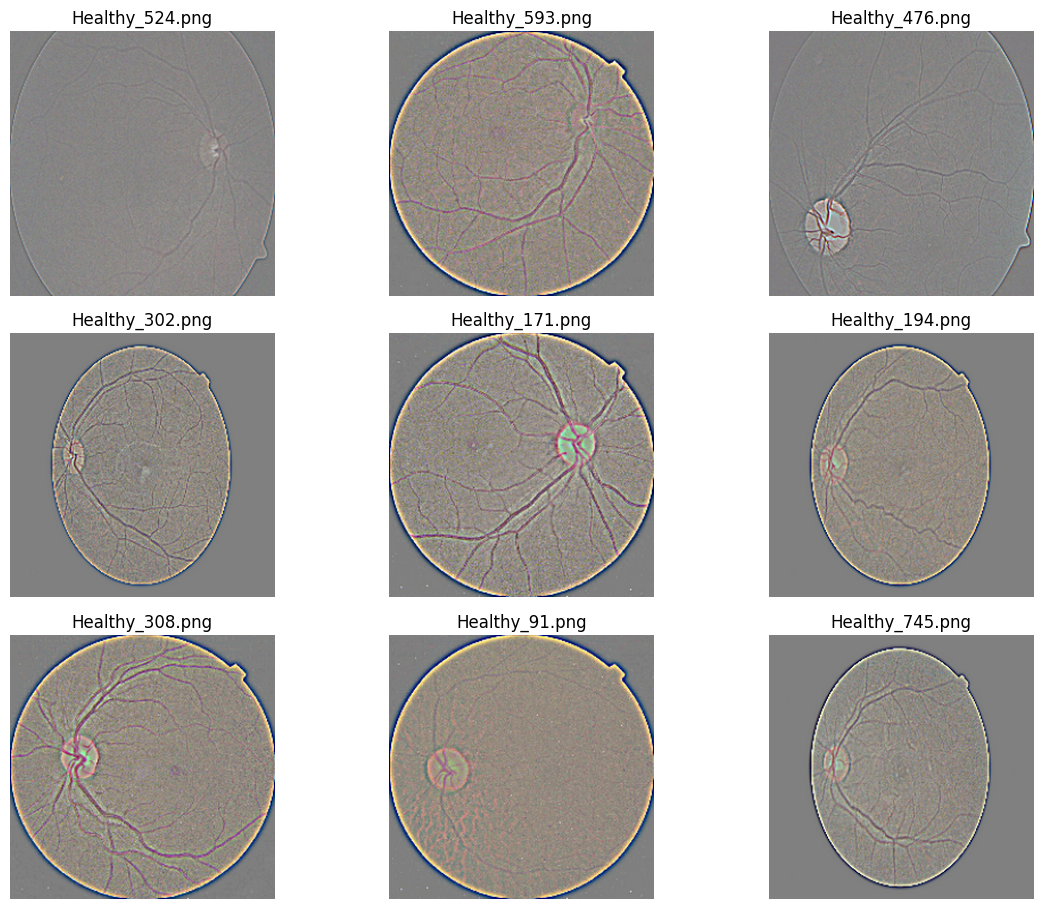

In [ ]:
path1="/content/drive/MyDrive/Eye-diabetic-vision/Healthy/"
images=os.listdir(path1)
print(f"number of the pictures is: {len(os.listdir(path1))} for healthy patients")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))
for indx, axis in enumerate (axes.flatten()):
    rnd_indx = np.random.randint(0, len(os.listdir(path1)))
    img = plt.imread(path1 + images[rnd_indx])
    imgplot = axis.imshow(img)
    axis.set_title(images[rnd_indx])
    axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

There are 290 pictures of Proliferated.


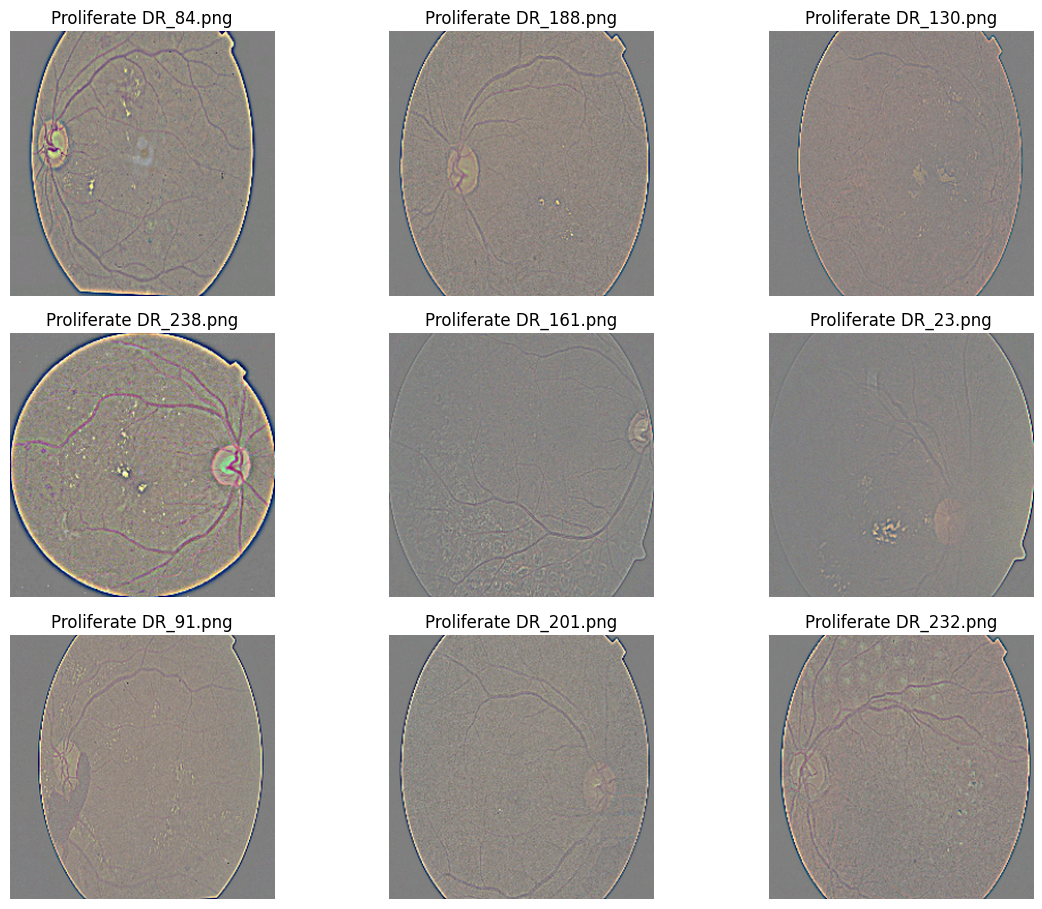

In [ ]:
PATH4 = "/content/drive/MyDrive/Eye-diabetic-vision/Proliferate DR/"
images4 = os.listdir(PATH4)
print(f'There are {len(os.listdir(PATH4))} pictures of Proliferated.')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(os.listdir(PATH4)))
    img = plt.imread(PATH4 + images4[rnd_indx])
    imgplot = axis.imshow(img)
    axis.set_title(images4[rnd_indx])
    axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

there are 370 images for mild Diabetic retinopathy


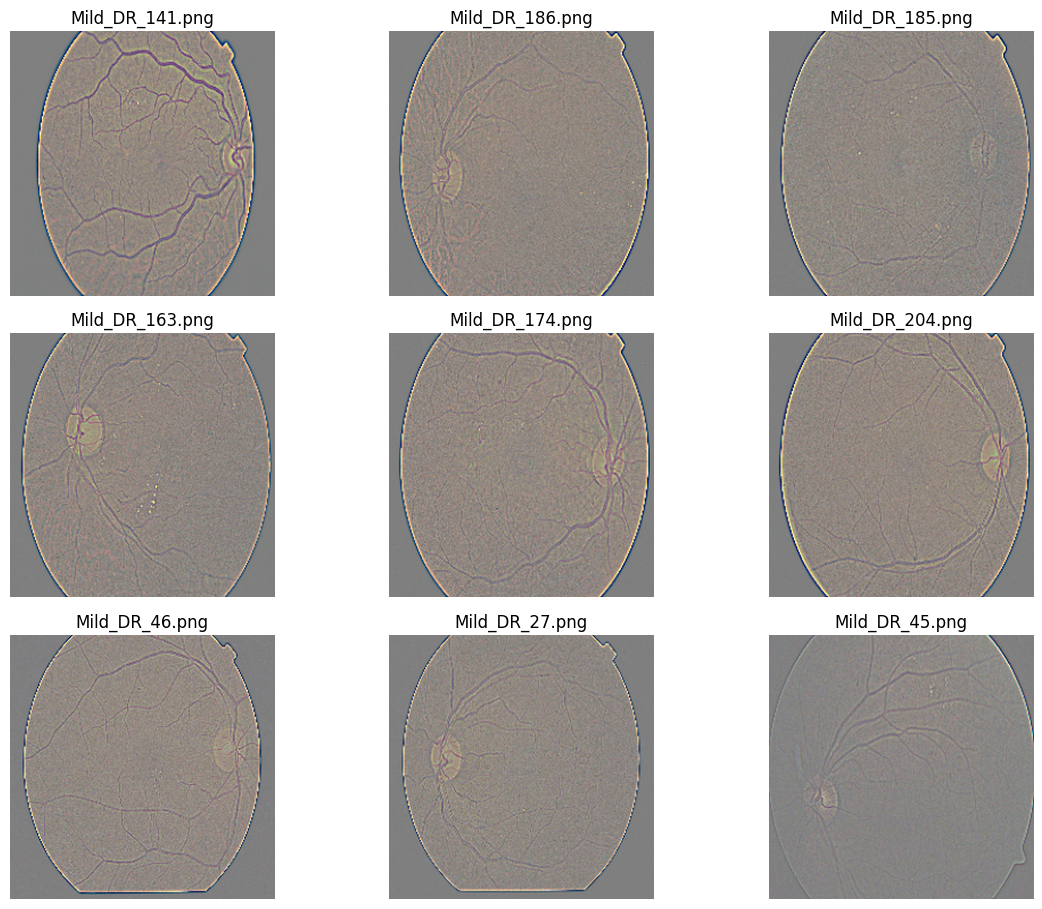

In [ ]:
path2="/content/drive/MyDrive/Eye-diabetic-vision/Mild DR/"
images2=os.listdir(path2)
print(f"there are {len(os.listdir(path2))} images for mild Diabetic retinopathy")
fig, axes = plt.subplots(ncols=3,nrows=3,figsize=(12,10))
for indx, axis in enumerate (axes.flatten()):
  rnd_indx=np.random.randint(0, len(os.listdir(path2)))
  img = plt.imread(path2 + images2[rnd_indx])
  imgplot = axis.imshow(img)
  axis.set_title(images2[rnd_indx])
  axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

there are 900 images for moderate Diabetic retinopathy


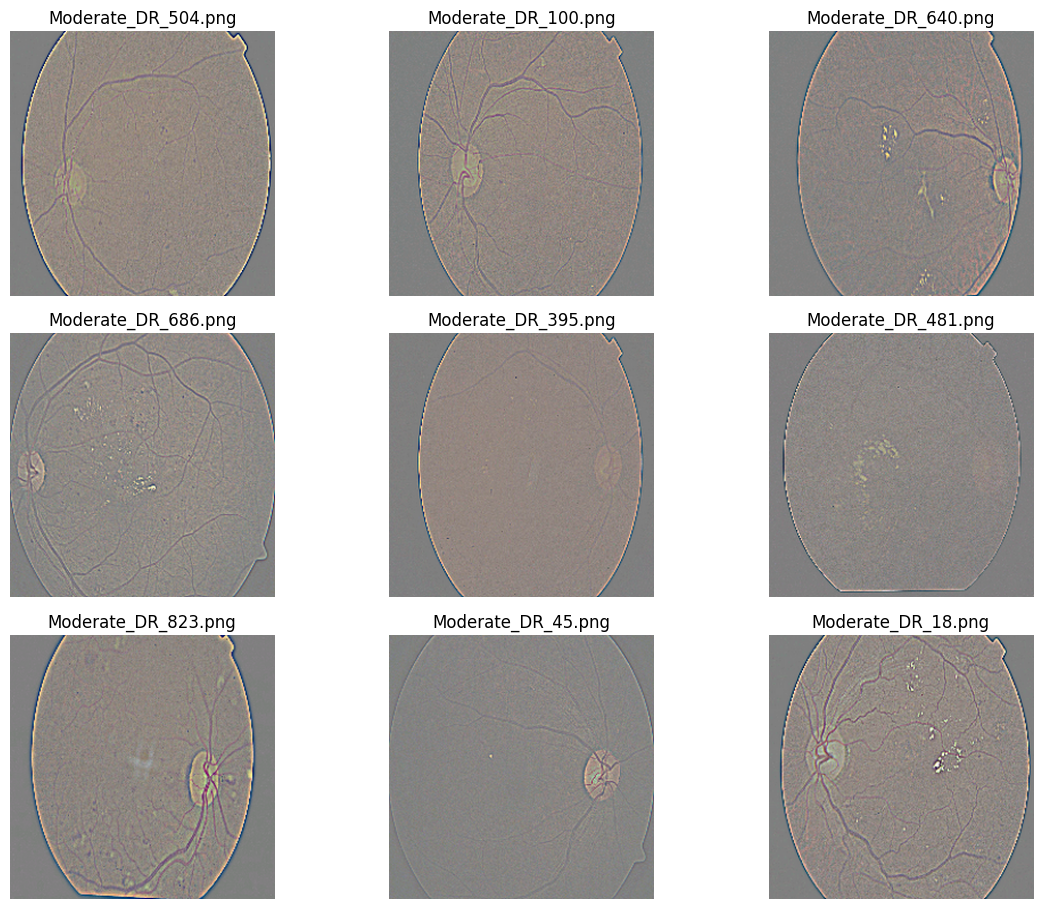

In [ ]:
path3="/content/drive/MyDrive/Eye-diabetic-vision/Moderate DR/"
images3=os.listdir(path3)
print(f"there are {len(os.listdir(path3))} images for moderate Diabetic retinopathy")
fig, axes = plt.subplots(ncols=3,nrows=3,figsize=(12,10))
for indx, axis in enumerate (axes.flatten()):
  rnd_indx=np.random.randint(0, len(os.listdir(path3)))
  img = plt.imread(path3+ images3[rnd_indx])
  imgplot = axis.imshow(img)
  axis.set_title(images3[rnd_indx])
  axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

there are 190 images for moderate Diabetic retinopathy


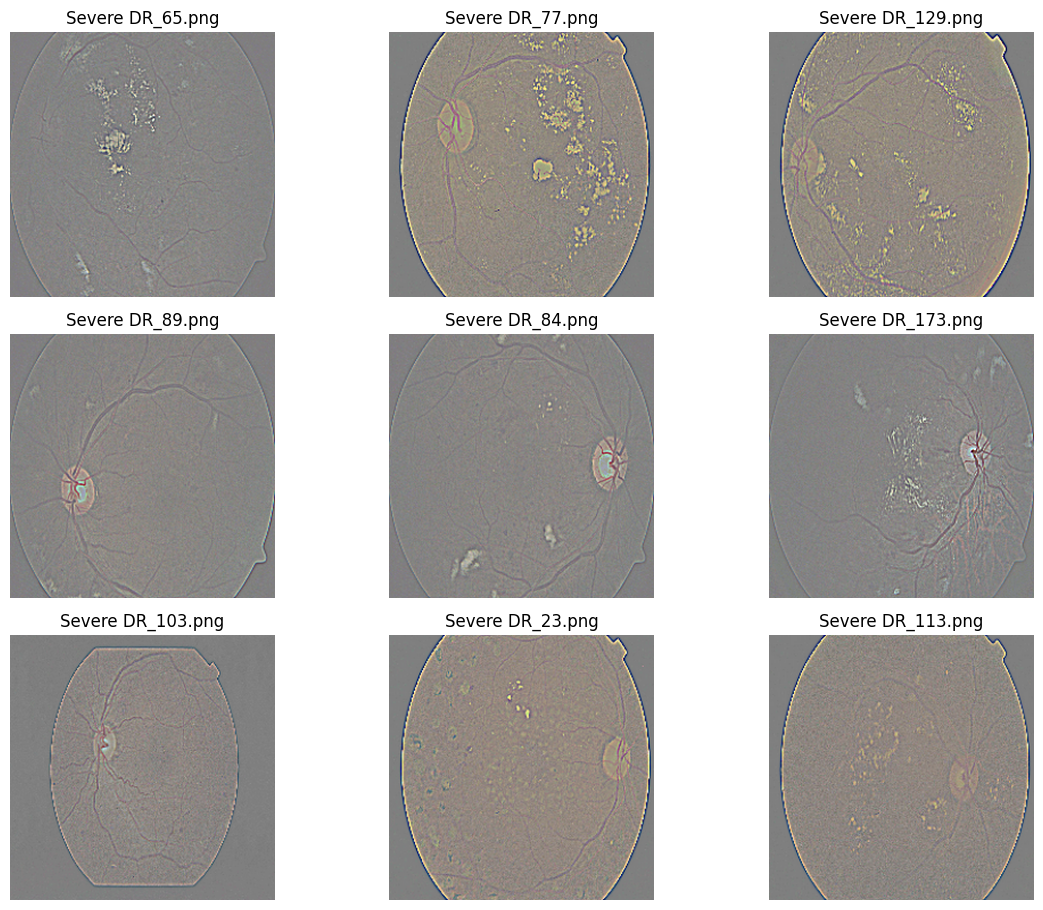

In [ ]:
Path5="/content/drive/MyDrive/Eye-diabetic-vision/Severe DR/"
images5=os.listdir(Path5)
print(f"there are {len(os.listdir(Path5))} images for moderate Diabetic retinopathy")
fig, axes = plt.subplots(ncols=3,nrows=3,figsize=(12,10))
for indx, axis in enumerate (axes.flatten()):
  rnd_indx=np.random.randint(0, len(os.listdir(Path5)))
  img = plt.imread(Path5+ images5[rnd_indx])
  imgplot = axis.imshow(img)
  axis.set_title(images5[rnd_indx])
  axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])



In [ ]:
len(images),len(images2),len(images3),len(images4),len(images5),len(images)+len(images2)+len(images3)+len(images4)+len(images5)

(1000, 370, 900, 290, 190, 2750)

In [ ]:
df_temp=pd.DataFrame(np.zeros(len(images)+len(images2)+len(images3)+len(images4)+len(images5)),columns=['Target'])
df_temp.value_counts()
df_temp

Target
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
...      ...
2745     0.0
2746     0.0
2747     0.0
2748     0.0
2749     0.0

[2750 rows x 1 columns]

In [ ]:

df_temp.loc[:,"Target"]=4
df_temp.value_counts()

Target
4.0       2750
Name: count, dtype: int64

In [ ]:
df_temp.loc[:2559,"Target"]=3
df_temp.value_counts()

Target
3.0       2560
4.0        190
Name: count, dtype: int64

In [ ]:
df_temp.loc[:2269,"Target"]=2
df_temp.value_counts()

Target
2.0       2270
3.0        290
4.0        190
Name: count, dtype: int64

In [ ]:
df_temp.loc[:1369,"Target"]=1
df_temp.value_counts()

Target
1.0       1370
2.0        900
3.0        290
4.0        190
Name: count, dtype: int64

In [ ]:
df_temp.loc[:999,"Target"]=0
df_temp.value_counts()

Target
0.0       1000
2.0        900
1.0        370
3.0        290
4.0        190
Name: count, dtype: int64

<Axes: xlabel='Target'>

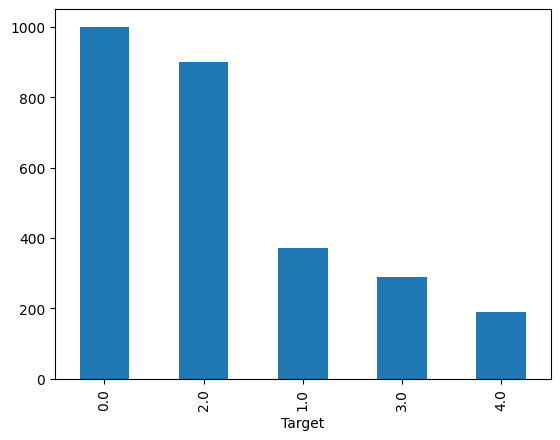

In [ ]:
df_temp.shape
df_temp.Target.value_counts().plot(kind="bar")

In [ ]:
label=df_temp.copy()

In [ ]:
label.Target.value_counts()

Target
0.0    1000
2.0     900
1.0     370
3.0     290
4.0     190
Name: count, dtype: int64

In [ ]:
filenames=[]
filenames=["drive/MyDrive/Eye-diabetic-vision/Healthy/"+fname for fname in images]
filenames[:10]

['drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_109.png',
 'drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_185.png',
 'drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_19.png',
 'drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_169.png',
 'drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_205.png',
 'drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_116.png',
 'drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_150.png',
 'drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_173.png',
 'drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_154.png',
 'drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_178.png']

In [ ]:
len(filenames)

1000

In [ ]:

filenames1=["drive/MyDrive/Eye-diabetic-vision/Mild DR/"+fname for fname in images2]
len(filenames1)

370

In [ ]:
len(filenames)

1000

In [ ]:
filenames2=["drive/MyDrive/Eye-diabetic-vision/Moderate DR/"+fname for fname in images3]
len(filenames2)

900

In [ ]:
filenames3=["drive/MyDrive/Eye-diabetic-vision/Proliferate DR/"+fname for fname in images4]
len(filenames3)

290

In [ ]:
filenames4=["drive/MyDrive/Eye-diabetic-vision/Severe DR/"+fname for fname in images5]
len(filenames4)

190

In [ ]:
photos_path=filenames+filenames1+filenames2+filenames3+filenames4
photos_path[1000:]

['drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_131.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_160.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_164.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_153.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_163.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_117.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_166.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_145.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_118.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_154.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_112.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_127.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_126.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_106.png',
 'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_135.png',
 'drive/MyDr

In [ ]:
if(len(df_temp["Target"]))==len(photos_path):
  print("they are same")
else:
  print("they don't")



they are same


In [ ]:
df_temp["photos_path"]=photos_path

In [ ]:
df_temp

Target                                        photos_path
0        0.0  drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...
1        0.0  drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...
2        0.0  drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...
3        0.0  drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...
4        0.0  drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...
...      ...                                                ...
2745     4.0  drive/MyDrive/Eye-diabetic-vision/Severe DR/Se...
2746     4.0  drive/MyDrive/Eye-diabetic-vision/Severe DR/Se...
2747     4.0  drive/MyDrive/Eye-diabetic-vision/Severe DR/Se...
2748     4.0  drive/MyDrive/Eye-diabetic-vision/Severe DR/Se...
2749     4.0  drive/MyDrive/Eye-diabetic-vision/Severe DR/Se...

[2750 rows x 2 columns]

In [ ]:
tf.random.set_seed(42)
df_final=df_temp.sample(frac=1)
df_final.reset_index(drop=True,inplace=True)
df_final

Target                                        photos_path
0        0.0  drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...
1        0.0  drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...
2        0.0  drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...
3        1.0  drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild...
4        4.0  drive/MyDrive/Eye-diabetic-vision/Severe DR/Se...
...      ...                                                ...
2745     0.0  drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...
2746     4.0  drive/MyDrive/Eye-diabetic-vision/Severe DR/Se...
2747     4.0  drive/MyDrive/Eye-diabetic-vision/Severe DR/Se...
2748     4.0  drive/MyDrive/Eye-diabetic-vision/Severe DR/Se...
2749     3.0  drive/MyDrive/Eye-diabetic-vision/Proliferate ...

[2750 rows x 2 columns]

In [ ]:
y=df_final["Target"]
np.unique(y)

array([0., 1., 2., 3., 4.])

In [ ]:
np.unique(y[1])

array([0.])

In [ ]:

y_temp=np.unique(y)
y[0] == y_temp
boolean_labels=[label==y_temp for label in y]
boolean_labels[:5]

[array([False,  True, False, False, False]),
 array([ True, False, False, False, False]),
 array([False,  True, False, False, False]),
 array([False,  True, False, False, False]),
 array([ True, False, False, False, False])]

In [ ]:
x=df_final.photos_path.tolist()
y=boolean_labels
x[:5],y[:5]


(['drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_278.png',
  'drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_207.png',
  'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_367.png',
  'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_7.png',
  'drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_645.png'],
 [array([False,  True, False, False, False]),
  array([ True, False, False, False, False]),
  array([False,  True, False, False, False]),
  array([False,  True, False, False, False]),
  array([ True, False, False, False, False])])

In [ ]:
from matplotlib.pyplot import imread
image= imread(df_temp["photos_path"][42])
image.shape

(256, 256, 3)

In [ ]:
x[:5],y[:5]

(['drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_278.png',
  'drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_207.png',
  'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_367.png',
  'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_7.png',
  'drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_645.png'],
 [array([False,  True, False, False, False]),
  array([ True, False, False, False, False]),
  array([False,  True, False, False, False]),
  array([False,  True, False, False, False]),
  array([ True, False, False, False, False])])

In [ ]:
len(y_temp)

5

In [ ]:
tf.random.set_seed(42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
len(x_train),len(y_train),len(x_test),len(y_test)

(2200, 2200, 550, 550)

In [ ]:
y_test

[array([False, False, False, False,  True]),
 array([False, False, False,  True, False]),
 array([False,  True, False, False, False]),
 array([False, False, False, False,  True]),
 array([False, False,  True, False, False]),
 array([False, False,  True, False, False]),
 array([False, False,  True, False, False]),
 array([False, False,  True, False, False]),
 array([ True, False, False, False, False]),
 array([False, False,  True, False, False]),
 array([ True, False, False, False, False]),
 array([False, False,  True, False, False]),
 array([False, False, False, False,  True]),
 array([False,  True, False, False, False]),
 array([False,  True, False, False, False]),
 array([ True, False, False, False, False]),
 array([False, False, False, False,  True]),
 array([False, False, False, False,  True]),
 array([False,  True, False, False, False]),
 array([False,  True, False, False, False]),
 array([False, False,  True, False, False]),
 array([False, False, False,  True, False]),
 array([Fa

In [ ]:
y_test=np.array(y_test)


In [ ]:
x_train[:5],y_train[:5]

(['drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_126.png',
  'drive/MyDrive/Eye-diabetic-vision/Moderate DR/Moderate_DR_215.png',
  'drive/MyDrive/Eye-diabetic-vision/Proliferate DR/Proliferate DR_249.png',
  'drive/MyDrive/Eye-diabetic-vision/Healthy/Healthy_159.png',
  'drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild_DR_26.png'],
 [array([False,  True, False, False, False]),
  array([False, False,  True, False, False]),
  array([False, False, False,  True, False]),
  array([ True, False, False, False, False]),
  array([False,  True, False, False, False])])

In [ ]:
from matplotlib.pyplot import imread
image=imread(df_final["photos_path"][100])
image.shape

(256, 256, 3)

In [ ]:
image.max(),image.min()

(1.0, 0.0)

In [ ]:
tf.constant(image)

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.5019608 , 0.5019608 , 0.5019608 ],
        [0.49803922, 0.5137255 , 0.5019608 ],
        [0.50980395, 0.5019608 , 0.49803922],
        ...,
        [0.49803922, 0.49803922, 0.49803922],
        [0.4862745 , 0.4862745 , 0.4862745 ],
        [0.5019608 , 0.5019608 , 0.5019608 ]],

       [[0.5019608 , 0.5019608 , 0.5019608 ],
        [0.49411765, 0.5137255 , 0.5019608 ],
        [0.5137255 , 0.5058824 , 0.5019608 ],
        ...,
        [0.49803922, 0.49803922, 0.49803922],
        [0.49411765, 0.49411765, 0.49411765],
        [0.5019608 , 0.4862745 , 0.4862745 ]],

       [[0.49803922, 0.48235294, 0.4862745 ],
        [0.5058824 , 0.49019608, 0.4862745 ],
        [0.49019608, 0.49803922, 0.49019608],
        ...,
        [0.5019608 , 0.49803922, 0.5019608 ],
        [0.50980395, 0.5019608 , 0.49803922],
        [0.49019608, 0.5019608 , 0.4862745 ]],

       ...,

       [[0.5019608 , 0.5019608 , 0.5019608 ],
        [0.50

In [ ]:
# Define image size
IMG_SIZE = 224


# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path ,"file_reader")


  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired value (224, 224)

  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
def create_model(input_shape=(224, 224, 3), output_shape=5): # Assuming OUTPUT_SHAPE is 2
  model = ResNet50(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

  # Use the Functional API instead of Sequential
  inputs = tf.keras.Input(shape=input_shape)
  x = model(inputs)
  x = GlobalAveragePooling2D()(x)
  outputs = Dense(units=output_shape, activation="softmax")(x)
  model = Model(inputs=inputs, outputs=outputs)

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()] # Instantiate the metrics
  )

  return model

In [ ]:
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE,  test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
train_data=create_data_batches(x_train,y_train)
test_data=create_data_batches(x_test,test_data=True)

Creating training data batches...
Creating test data batches...


In [ ]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 5), dtype=tf.bool, name=None))

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(y_temp)



In [ ]:
len(y_temp)

5

In [ ]:
INPUT_SHAPE

[None, 224, 224, 3]

In [ ]:
base_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Use the Functional API instead of Sequential
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs)  # Apply base_model to the input
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Add a pooling layer for dimensionality reduction
outputs = tf.keras.layers.Dense(units=5, activation="softmax")(x)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

  # Convert metrics to strings (if they are not already)
metrics = ["accuracy", "Precision", "Recall"]

model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      metrics=metrics)  # Pass metrics as strings

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
 model.fit(x=train_data,
            epochs=10)

In [ ]:
y_preds=model.predict(test_data)

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return y_temp[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(y_preds[81])
pred_label

In [ ]:
# First prediction
index = 42
print(y_preds[index])
print(f"Max value (probability of prediction): {np.max(y_preds[index])}")
print(f"Sum: {np.sum(y_preds[index])}")
print(f"Max index: {np.argmax(y_preds[index])}")
print(f"Predicted label: {y_temp[np.argmax(y_preds[index])]}")
print(f"True label: {np.argmax(y_test[index])}")

In [ ]:
y_test

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_preds is a 2D array of probabilities, convert it to predicted labels
y_pred_labels = np.argmax(y_preds, axis=1)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_preds)
print("Accuracy:", accuracy)

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', ' 1', ' 2','3','4'], yticklabels=['Healthy', ' 1', ' 2','3','4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:


from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_labels, average='macro')
print("Precision (Macro):", precision)
print("Recall (Macro):", recall)
print("F1-Score (Macro):", f1)

# For Micro Average
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_labels, average='micro')
print("Precision (Micro):", precision)
print("Recall (Micro):", recall)
print("F1-Score (Micro):", f1)

# For Weighted Average
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_labels, average='weighted')
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1-Score (Weighted):", f1)

Precision (Macro): 0.17430683918669132
Recall (Macro): 0.19726035167328418
F1-Score (Macro): 0.11007364950232656
Precision (Micro): 0.36727272727272725
Recall (Micro): 0.36727272727272725
F1-Score (Micro): 0.3672727272727273
Precision (Weighted): 0.2948445639388338
Recall (Weighted): 0.36727272727272725
F1-Score (Weighted): 0.20444760071828574


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


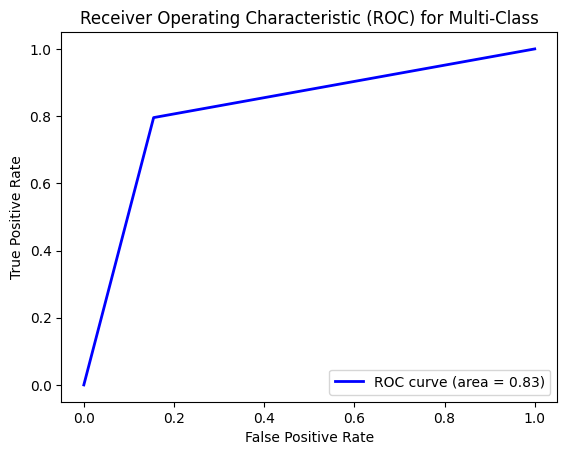

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_true_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred_labels, classes=[0, 1, 2])

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc = roc_auc_score(y_true_bin, y_pred_bin, average='macro')
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc='lower right')
plt.show()





In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 23597957 (90.02 MB)
Trainable params: 23544837 (89.82 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  label
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Check if image is a string (potential path) and load it if so
  if isinstance(image, str):
    import matplotlib.image as mpimg  # Import for image loading
    image = mpimg.imread(image)  # Load image from the path

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  # Use .all() to check if all elements in the arrays are equal
  if (pred_label == np.argmax(true_label)).all():  # Modified line
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

### Implementing Data Augmentation

In [ ]:
# Define image size
IMG_SIZE = 224


# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path ,"file_reader")
    # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  #data_augmentation
  image = tf.image.random_flip_left_right(image)  # Random horizontal flip
  image = tf.image.random_brightness(image, max_delta=0.2)  # Random brightness
  image = tf.image.random_contrast(image, lower=0.8, upper=1.2)  # Random contrast
  image = tf.image.random_saturation(image, lower=0.8, upper=1.2)  # Random saturation
  image = tf.image.random_hue(image, max_delta=0.1)  # Random hue
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired value (224, 224)

  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
train_data=create_data_batches(x_train,y_train)
test_data=create_data_batches(x_test,test_data=True)

Creating training data batches...
Creating test data batches...


In [ ]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 5), dtype=tf.bool, name=None))

In [ ]:
model.fit(train_data,epochs=10)

Epoch 1/10
69/69 [==============================] - 128s 2s/step - loss: 0.8025 - accuracy: 0.7209 - precision: 0.7805 - recall: 0.6368
Epoch 2/10
69/69 [==============================] - 130s 2s/step - loss: 0.6139 - accuracy: 0.7686 - precision: 0.8283 - recall: 0.7105
Epoch 3/10
69/69 [==============================] - 130s 2s/step - loss: 0.5838 - accuracy: 0.7886 - precision: 0.8293 - recall: 0.7309
Epoch 4/10
69/69 [==============================] - 129s 2s/step - loss: 0.5773 - accuracy: 0.7864 - precision: 0.8307 - recall: 0.7336
Epoch 5/10
69/69 [==============================] - 130s 2s/step - loss: 0.5103 - accuracy: 0.8086 - precision: 0.8553 - recall: 0.7523
Epoch 6/10
69/69 [==============================] - 131s 2s/step - loss: 0.4799 - accuracy: 0.8259 - precision: 0.8664 - recall: 0.7814
Epoch 7/10
69/69 [==============================] - 132s 2s/step - loss: 0.4583 - accuracy: 0.8282 - precision: 0.8647 - recall: 0.7900
Epoch 8/10
69/69 [==============================

In [ ]:
y_preds=model.predict(test_data)

18/18 [==============================] - 9s 486ms/step


In [ ]:
y_preds

array([[9.9985385e-01, 1.7110864e-05, 1.2908083e-04, 6.3824848e-09,
        6.4599548e-11],
       [3.1912170e-04, 1.3071156e-01, 8.5210139e-01, 1.6601834e-02,
        2.6615485e-04],
       [1.7266750e-01, 6.8380320e-01, 9.8842405e-02, 2.4742268e-02,
        1.9944504e-02],
       ...,
       [6.6643751e-01, 2.0899065e-01, 6.3969716e-02, 5.5813447e-02,
        4.7887405e-03],
       [9.9994826e-01, 4.1863197e-05, 9.7610882e-06, 6.0106728e-08,
        3.0509519e-11],
       [9.9933857e-01, 6.6116935e-04, 1.4074831e-07, 6.5090013e-08,
        5.5320749e-13]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming y_preds is a 2D array of probabilities, convert it to predicted labels
y_pred_labels = np.argmax(y_preds, axis=1)

# Convert y_test to multiclass if it's in multilabel-indicator format
if y_test.ndim == 2:  # Check if y_test is a 2D array (multilabel-indicator)
    y_test = np.argmax(y_test, axis=1)  # Convert to multiclass

accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)



NameError: name 'y_preds' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', ' 1', ' 2','3','4'], yticklabels=['Healthy', ' 1', ' 2','3','4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_labels, average='macro')
print("Precision (Macro):", precision)
print("Recall (Macro):", recall)
print("F1-Score (Macro):", f1)

# For Micro Average
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_labels, average='micro')
print("Precision (Micro):", precision)
print("Recall (Micro):", recall)
print("F1-Score (Micro):", f1)

# For Weighted Average
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_labels, average='weighted')
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1-Score (Weighted):", f1)


Precision (Macro): 0.5421653582265599
Recall (Macro): 0.5163290745921565
F1-Score (Macro): 0.4979476239758881
Precision (Micro): 0.7
Recall (Micro): 0.7
F1-Score (Micro): 0.7
Precision (Weighted): 0.6497228607432707
Recall (Weighted): 0.7
F1-Score (Weighted): 0.6617142083319146


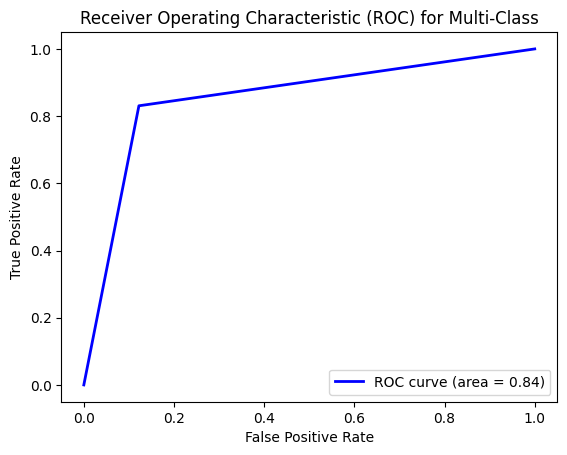

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_true_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred_labels, classes=[0, 1, 2])

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc = roc_auc_score(y_true_bin, y_pred_bin, average='macro')
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Unfreeze the last few layers of the base model
for layer in base_model.layers[-20:]:
    layer.trainable = True



In [ ]:
metrics = ["accuracy", "Precision", "Recall"]
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=metrics)

# Continue training the model
model.fit(
    train_data,
    epochs=10)

In [ ]:
y_preds=model.predict(test_data)

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_preds is a 2D array of probabilities, convert it to predicted labels
y_pred_labels = np.argmax(y_preds, axis=1)

accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', ' 1', ' 2','3','4'], yticklabels=['Healthy', ' 1', ' 2','3','4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_labels, average='macro')
print("Precision (Macro):", precision)
print("Recall (Macro):", recall)
print("F1-Score (Macro):", f1)

# For Micro Average
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_labels, average='micro')
print("Precision (Micro):", precision)
print("Recall (Micro):", recall)
print("F1-Score (Micro):", f1)

# For Weighted Average
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_labels, average='weighted')
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1-Score (Weighted):", f1)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_true_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred_labels, classes=[0, 1, 2])

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc = roc_auc_score(y_true_bin, y_pred_bin, average='macro')
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
plot_pred(y_preds, y_test, x_test, n=91)

### Over-Sampling

In [ ]:
df_temp

Target                                        photos_path
0        0.0  drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...
1        0.0  drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...
2        0.0  drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...
3        0.0  drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...
4        0.0  drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...
...      ...                                                ...
2745     4.0  drive/MyDrive/Eye-diabetic-vision/Severe DR/Se...
2746     4.0  drive/MyDrive/Eye-diabetic-vision/Severe DR/Se...
2747     4.0  drive/MyDrive/Eye-diabetic-vision/Severe DR/Se...
2748     4.0  drive/MyDrive/Eye-diabetic-vision/Severe DR/Se...
2749     4.0  drive/MyDrive/Eye-diabetic-vision/Severe DR/Se...

[2750 rows x 2 columns]

In [ ]:
x=df_temp["photos_path"]
y=df_temp["Target"]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
y_train.value_counts(),y_test.value_counts()

(Target
 0.0    796
 2.0    727
 1.0    292
 3.0    224
 4.0    161
 Name: count, dtype: int64,
 Target
 0.0    204
 2.0    173
 1.0     78
 3.0     66
 4.0     29
 Name: count, dtype: int64)

In [ ]:
train_df = pd.DataFrame({'photos_path': x_train, 'Target': y_train})
minority_df=train_df.drop(train_df[train_df["Target"]==0].index)
minority_df=minority_df.drop(minority_df[minority_df["Target"]==2].index)
minority_df

photos_path  Target
2323  drive/MyDrive/Eye-diabetic-vision/Proliferate ...     3.0
2464  drive/MyDrive/Eye-diabetic-vision/Proliferate ...     3.0
1244  drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild...     1.0
1283  drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild...     1.0
2546  drive/MyDrive/Eye-diabetic-vision/Proliferate ...     3.0
...                                                 ...     ...
2391  drive/MyDrive/Eye-diabetic-vision/Proliferate ...     3.0
1238  drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild...     1.0
1095  drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild...     1.0
1130  drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild...     1.0
1294  drive/MyDrive/Eye-diabetic-vision/Mild DR/Mild...     1.0

[677 rows x 2 columns]

In [ ]:
majority_df=train_df.drop(train_df[train_df["Target"]==1].index)
majority_df=majority_df.drop(majority_df[majority_df["Target"]==3].index)
majority_df=majority_df.drop(majority_df[majority_df["Target"]==4].index)

majority_df

photos_path  Target
1904  drive/MyDrive/Eye-diabetic-vision/Moderate DR/...     2.0
179   drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...     0.0
2210  drive/MyDrive/Eye-diabetic-vision/Moderate DR/...     2.0
2206  drive/MyDrive/Eye-diabetic-vision/Moderate DR/...     2.0
480   drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...     0.0
...                                                 ...     ...
330   drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...     0.0
466   drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...     0.0
2169  drive/MyDrive/Eye-diabetic-vision/Moderate DR/...     2.0
1638  drive/MyDrive/Eye-diabetic-vision/Moderate DR/...     2.0
860   drive/MyDrive/Eye-diabetic-vision/Healthy/Heal...     0.0

[1523 rows x 2 columns]

In [ ]:
minority_df.Target.value_counts(),majority_df.Target.value_counts()

(Target
 1.0    292
 3.0    224
 4.0    161
 Name: count, dtype: int64,
 Target
 0.0    796
 2.0    727
 Name: count, dtype: int64)

In [ ]:
from sklearn.utils import resample

# Assuming you have a list of images and labels
minority_images,minority_labels = minority_df.photos_path.tolist(),minority_df.Target.tolist()
majority_images, majority_labels = majority_df.photos_path.tolist(),majority_df.Target.tolist()

In [ ]:
# Resample minority class
minority_images_resampled, minority_labels_resampled = resample(
    minority_images, minority_labels,
    replace=True,
    n_samples=len(majority_images),
    random_state=123
)

In [ ]:
balanced_images = majority_images + minority_images_resampled
balanced_labels = majority_labels + minority_labels_resampled

In [ ]:
len(balanced_images),len(balanced_labels)

(3046, 3046)

In [ ]:
balanced_labels_series = pd.Series(balanced_labels)
balanced_labels_series.value_counts()

0.0    796
2.0    727
1.0    656
3.0    523
4.0    344
Name: count, dtype: int64

In [ ]:
import tensorflow as tf

balanced_labels_encoded = tf.keras.utils.to_categorical(balanced_labels, num_classes=5)  # One-hot encode

train_data = create_data_batches(balanced_images, balanced_labels_encoded)

Creating training data batches...


In [ ]:
test_data=create_data_batches(x_test,test_data=True)

Creating test data batches...


In [ ]:
model_fine_tuned.fit(train_data, epochs=10)

Epoch 1/10
96/96 [==============================] - 36s 350ms/step - loss: 0.4244 - accuracy: 0.8664 - precision: 0.8866 - recall: 0.8473
Epoch 2/10
96/96 [==============================] - 33s 344ms/step - loss: 0.2502 - accuracy: 0.9160 - precision: 0.9320 - recall: 0.9048
Epoch 3/10
96/96 [==============================] - 33s 341ms/step - loss: 0.1943 - accuracy: 0.9324 - precision: 0.9401 - recall: 0.9225
Epoch 4/10
96/96 [==============================] - 33s 344ms/step - loss: 0.1577 - accuracy: 0.9514 - precision: 0.9571 - recall: 0.9439
Epoch 5/10
96/96 [==============================] - 33s 341ms/step - loss: 0.1524 - accuracy: 0.9488 - precision: 0.9531 - recall: 0.9416
Epoch 6/10
96/96 [==============================] - 33s 342ms/step - loss: 0.1509 - accuracy: 0.9498 - precision: 0.9567 - recall: 0.9419
Epoch 7/10
96/96 [==============================] - 33s 337ms/step - loss: 0.1205 - accuracy: 0.9580 - precision: 0.9623 - recall: 0.9557
Epoch 8/10
96/96 [================

In [ ]:
y_pred_probs=model_fine_tuned.predict(test_data)

18/18 [==============================] - 6s 318ms/step


In [ ]:
y_preds=np.argmax(y_pred_probs,axis=1)

In [ ]:
len(x_test),len(y_test)

(550, 550)

In [ ]:
y_preds

array([2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 4, 0, 1,
       2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1,
       2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2,
       0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 4, 0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 4, 0, 0, 2, 0, 1, 2, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1,

In [ ]:
print(len(y_pred_probs), type(y_pred_probs))
print(len(y_test), type(y_test))
print(len(x_test), type(x_test))

if isinstance(y_test, pd.Series):
    print(y_test.index)

550 <class 'numpy.ndarray'>
550 <class 'pandas.core.series.Series'>
550 <class 'pandas.core.series.Series'>
Index([1399,  978, 2168, 2232,  527,  889, 1582, 1498,  196,  798,
       ...
       2186,  100,  315, 2329,  755,  564,  764,  261,  662, 1488],
      dtype='int64', length=550)


In [ ]:
y_test_reset=y_test.reset_index(drop=True)

In [ ]:
x_test_reset=x_test.reset_index(drop=True)

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  label
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Check if image is a string (potential path) and load it if so
  if isinstance(image, str):
    import matplotlib.image as mpimg  # Import for image loading
    image = mpimg.imread(image)  # Load image from the path

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  # Use .all() to check if all elements in the arrays are equal
  if (pred_label == np.argmax(true_label)).all():  # Modified line
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

In [ ]:
from sklearn.metrics import accuracy_score



accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy)


Accuracy: 0.74


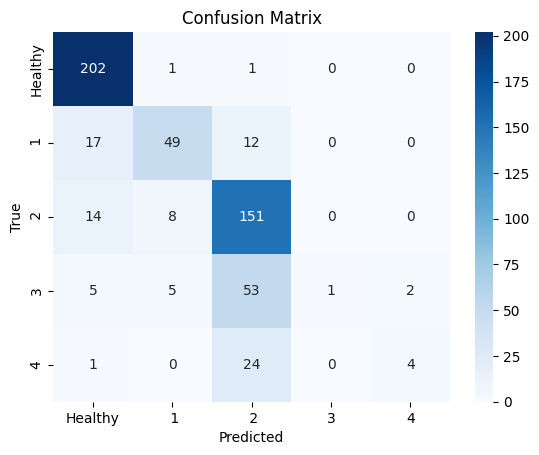

In [ ]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', ' 1', ' 2','3','4'], yticklabels=['Healthy', ' 1', ' 2','3','4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import precision_recall_fscore_support






In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test_reset, y_preds, average='macro')
print("Precision (Macro):", precision)
print("Recall (Macro):", recall)
print("F1-Score (Macro):", f1)

# For Micro Average
precision, recall, f1, _ = precision_recall_fscore_support(y_test_reset, y_preds, average='micro')
print("Precision (Micro):", precision)
print("Recall (Micro):", recall)
print("F1-Score (Micro):", f1)

# For Weighted Average
precision, recall, f1, _ = precision_recall_fscore_support(y_test_reset, y_preds, average='weighted')
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1-Score (Weighted):", f1)


Precision (Macro): 0.7832377491121567
Recall (Macro): 0.5288632252425941
F1-Score (Macro): 0.518978023497064
Precision (Micro): 0.74
Recall (Micro): 0.74
F1-Score (Micro): 0.74
Precision (Weighted): 0.7760229107512914
Recall (Weighted): 0.74
F1-Score (Weighted): 0.6819094296850472


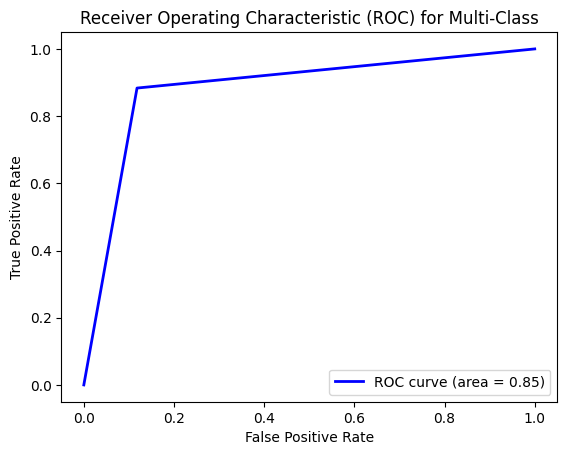

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_true_bin = label_binarize(y_test_reset, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_preds, classes=[0, 1, 2])

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc = roc_auc_score(y_true_bin, y_pred_bin, average='macro')
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc='lower right')
plt.show()


In [ ]:
metrics = ["accuracy", "Precision", "Recall"]

model_fine_tuned.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         loss='categorical_crossentropy',
                         metrics=metrics)

In [ ]:
model_fine_tuned.fit(train_data, epochs=10)

Epoch 1/10
96/96 [==============================] - 37s 346ms/step - loss: 0.8571 - accuracy: 0.6911 - precision: 0.7555 - recall: 0.6067
Epoch 2/10
96/96 [==============================] - 34s 351ms/step - loss: 0.6159 - accuracy: 0.7656 - precision: 0.8196 - recall: 0.7026
Epoch 3/10
96/96 [==============================] - 34s 353ms/step - loss: 0.5237 - accuracy: 0.8027 - precision: 0.8382 - recall: 0.7617
Epoch 4/10
96/96 [==============================] - 34s 349ms/step - loss: 0.5280 - accuracy: 0.8083 - precision: 0.8454 - recall: 0.7682
Epoch 5/10
96/96 [==============================] - 34s 355ms/step - loss: 0.4229 - accuracy: 0.8441 - precision: 0.8734 - recall: 0.8106
Epoch 6/10
96/96 [==============================] - 34s 349ms/step - loss: 0.3852 - accuracy: 0.8569 - precision: 0.8790 - recall: 0.8322
Epoch 7/10
96/96 [==============================] - 34s 352ms/step - loss: 0.3489 - accuracy: 0.8641 - precision: 0.8872 - recall: 0.8441
Epoch 8/10
96/96 [================

In [ ]:
metrics= ["accuracy", "Precision", "Recall"]
for layer in base_model.layers[-30:]:
    layer.trainable = True
model_fine_tuned.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         loss='categorical_crossentropy',
                         metrics=metrics)

In [ ]:
model_fine_tuned.fit(train_data, epochs=10)

Epoch 1/10
96/96 [==============================] - 40s 356ms/step - loss: 0.6195 - accuracy: 0.7741 - precision_1: 0.8120 - recall_1: 0.7190
Epoch 2/10
96/96 [==============================] - 34s 350ms/step - loss: 0.4404 - accuracy: 0.8322 - precision_1: 0.8618 - recall_1: 0.8004
Epoch 3/10
59/96 [=================>............] - ETA: 13s - loss: 0.3845 - accuracy: 0.8490 - precision_1: 0.8726 - recall_1: 0.8273

KeyboardInterrupt: 

In [ ]:
y_pred_probs=model_fine_tuned.predict(test_data)

In [ ]:
y_preds=np.argmax(y_pred_probs,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score



accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', ' 1', ' 2','3','4'], yticklabels=['Healthy', ' 1', ' 2','3','4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
for layer in base_model.layers[-50:]:
    layer.trainable = True
model_fine_tuned.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         loss='categorical_crossentropy',
                         metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
model_fine_tuned.fit(train_data, epochs=10)

In [ ]:
y_pred_probs=model_fine_tuned.predict(test_data)

In [ ]:
from sklearn.metrics import accuracy_score



accuracy = accuracy_score(y_test_reset, y_preds)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test_reset, y_preds, average='macro')
print("Precision (Macro):", precision)
print("Recall (Macro):", recall)
print("F1-Score (Macro):", f1)

# For Micro Average
precision, recall, f1, _ = precision_recall_fscore_support(y_test_reset, y_preds, average='micro')
print("Precision (Micro):", precision)
print("Recall (Micro):", recall)
print("F1-Score (Micro):", f1)

# For Weighted Average
precision, recall, f1, _ = precision_recall_fscore_support(y_test_reset, y_preds, average='weighted')
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1-Score (Weighted):", f1)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', ' 1', ' 2','3','4'], yticklabels=['Healthy', ' 1', ' 2','3','4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()